In [1]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# import plotly.express as px


dir = '../Data/H2giga/train'
rgb_dir = dir+"/images"
hs_dir = dir+"/hs"

In [2]:
hs_names = sorted(glob(hs_dir+"/*.npy"))
rgb_names = sorted(glob(rgb_dir+"/*.png"))
def bandIRnorm(Data):
   [m, n, l] = np.shape(Data)
   cube = np.zeros_like(Data)
   for i in range(l):
      q25 = np.percentile(Data[:, :, i],25)
      q75 = np.percentile(Data[:, :, i],75)
      iqr = (q75 - q25)*1.35
      cube[:, :, i] = (Data[:, :, i] - q25)/iqr
   return cube
def bandnorm(Data):
   [m, n, l] = np.shape(Data)
    
   for i in range(l):
      mean = np.mean(Data[:, :, i])
      std = np.std(Data[:, :, i])
      Data[:, :, i] = (Data[:, :, i] - mean)/std
   return Data
# print(rgb_names)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


../Data/H2giga/train/images/R26-C-D-CXP-E024-GS-B - 2129_0000002306_Total Focus (Orthographic).png


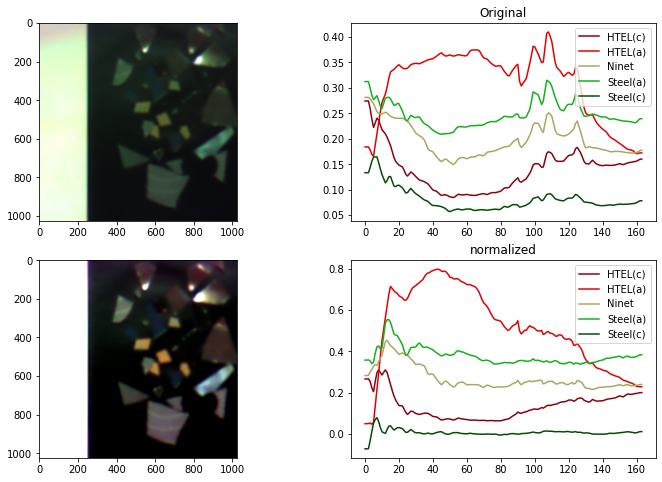

In [3]:
sax,say = (620,835)
scx,scy = (787,461)
nix,niy = (470,695)
hax,hay = (636,494)
hcx,hcy = (618,350)
hs_data = np.load(hs_names[0])
hsn = bandIRnorm(hs_data)
print(rgb_names[0])
fig,(ax1,ax2) = plt.subplots(2,2,figsize=(12,8))
ax1[0].imshow(hs_data[...,(45,100,160)])
ax1[1].plot(hs_data[hcy,hcx,:],color='#8C000F',label="HTEL(c)")
# HTEL(b)
ax1[1].plot(hs_data[hay,hax,:],color='#E50000',label="HTEL(a)")

# Ninet
ax1[1].plot(hs_data[niy,nix,:],color='#AAA662',label="Ninet")

# Steel(b)
ax1[1].plot(hs_data[say,sax,:],color='#15B01A',label="Steel(a)")

# Steel(b)
ax1[1].plot(hs_data[scy,scx,:],color='#054907',label="Steel(c)")
ax1[1].legend()
ax1[1].title.set_text("Original")

ax2[0].imshow(hsn[...,(45,100,160)])
ax2[1].plot(hsn[hcy,hcx,:],color='#8C000F',label="HTEL(c)")
# HTEL(b)
ax2[1].plot(hsn[hay,hax,:],color='#E50000',label="HTEL(a)")

# Ninet
ax2[1].plot(hsn[niy,nix,:],color='#AAA662',label="Ninet")

# Steel(b)
ax2[1].plot(hsn[say,sax,:],color='#15B01A',label="Steel(a)")

# Steel(b)
ax2[1].plot(hsn[scy,scx,:],color='#054907',label="Steel(c)")
ax2[1].legend()
ax2[1].title.set_text("normalized")

In [4]:
hslin = hs_data.reshape(-1,164)
hsnlin = hsn.reshape(-1,164)
pca = PCA(n_components=3)
hs_pc = pca.fit_transform(hslin)
hsn_pc = pca.fit_transform(hsnlin)


hs_pc = hs_pc.reshape(1024,1024,-1)
hsn_pc = hsn_pc.reshape(1024,1024,-1)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


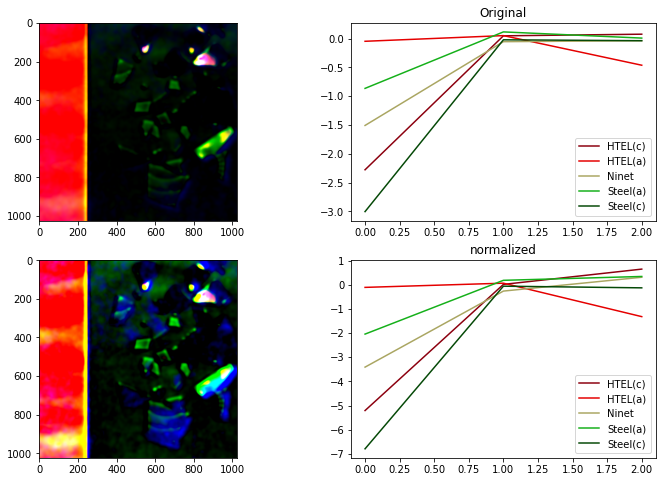

In [5]:
fig,(ax1,ax2) = plt.subplots(2,2,figsize=(12,8))
ax1[0].imshow(hs_pc)
ax1[1].plot(hs_pc[hcy,hcx,:],color='#8C000F',label="HTEL(c)")
# HTEL(b)
ax1[1].plot(hs_pc[hay,hax,:],color='#E50000',label="HTEL(a)")

# Ninet
ax1[1].plot(hs_pc[niy,nix,:],color='#AAA662',label="Ninet")

# Steel(b)
ax1[1].plot(hs_pc[say,sax,:],color='#15B01A',label="Steel(a)")

# Steel(b)
ax1[1].plot(hs_pc[scy,scx,:],color='#054907',label="Steel(c)")
ax1[1].legend()
ax1[1].title.set_text("Original")

ax2[0].imshow(hsn_pc)
ax2[1].plot(hsn_pc[hcy,hcx,:],color='#8C000F',label="HTEL(c)")
# HTEL(b)
ax2[1].plot(hsn_pc[hay,hax,:],color='#E50000',label="HTEL(a)")

# Ninet
ax2[1].plot(hsn_pc[niy,nix,:],color='#AAA662',label="Ninet")

# Steel(b)
ax2[1].plot(hsn_pc[say,sax,:],color='#15B01A',label="Steel(a)")

# Steel(b)
ax2[1].plot(hsn_pc[scy,scx,:],color='#054907',label="Steel(c)")
ax2[1].legend()
ax2[1].title.set_text("normalized")

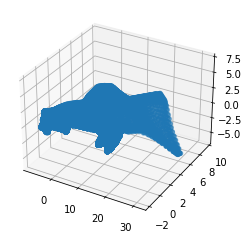

In [7]:
imPc = hsn_pc.reshape(-1,3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(imPc[:,0],imPc[:,1],imPc[:,2])

In [8]:
dir = '../Data/augmented/H2giga/test'
rgb_dir = dir+"/images"
hs_dir = dir+"/hs"

In [9]:
hs_names = sorted(glob(hs_dir+"/*.npy"))
rgb_names = sorted(glob(rgb_dir+"/*.png"))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


../Data/augmented/H2giga/test/images/R26-C-D-CXP-E024-GS-B - 2129_0000002644_Total Focus (Orthographic).png


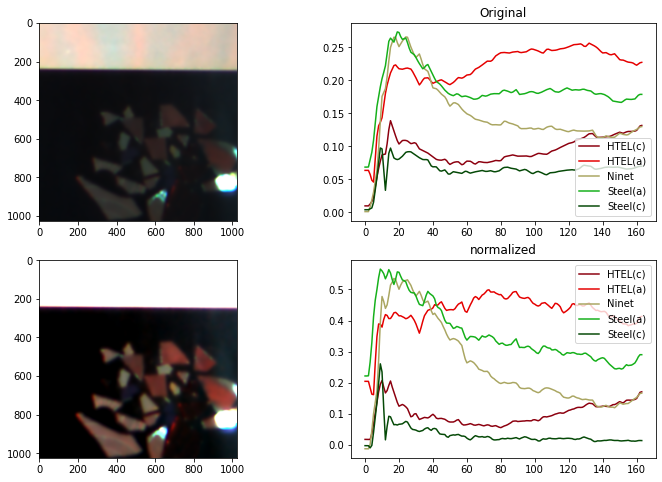

In [14]:
sax,say = (377,961)
scx,scy = (754,955)
nix,niy = (613,648)
hax,hay = (444,610)
hcx,hcy = (466,681)
hs_data = np.load(hs_names[0])
hsn = bandIRnorm(hs_data)
print(rgb_names[0])
fig,(ax1,ax2) = plt.subplots(2,2,figsize=(12,8))
ax1[0].imshow(hs_data[...,(45,100,160)])
ax1[1].plot(hs_data[hcy,hcx,:],color='#8C000F',label="HTEL(c)")
# HTEL(b)
ax1[1].plot(hs_data[hay,hax,:],color='#E50000',label="HTEL(a)")

# Ninet
ax1[1].plot(hs_data[niy,nix,:],color='#AAA662',label="Ninet")

# Steel(b)
ax1[1].plot(hs_data[say,sax,:],color='#15B01A',label="Steel(a)")

# Steel(b)
ax1[1].plot(hs_data[scy,scx,:],color='#054907',label="Steel(c)")
ax1[1].legend()
ax1[1].title.set_text("Original")

ax2[0].imshow(hsn[...,(45,100,160)])
ax2[1].plot(hsn[hcy,hcx,:],color='#8C000F',label="HTEL(c)")
# HTEL(b)
ax2[1].plot(hsn[hay,hax,:],color='#E50000',label="HTEL(a)")

# Ninet
ax2[1].plot(hsn[niy,nix,:],color='#AAA662',label="Ninet")

# Steel(b)
ax2[1].plot(hsn[say,sax,:],color='#15B01A',label="Steel(a)")

# Steel(b)
ax2[1].plot(hsn[scy,scx,:],color='#054907',label="Steel(c)")
ax2[1].legend()
ax2[1].title.set_text("normalized")

In [15]:
hslin = hs_data.reshape(-1,164)
hsnlin = hsn.reshape(-1,164)
pca = PCA(n_components=3)
hs_pc = pca.fit_transform(hslin)
hsn_pc = pca.fit_transform(hsnlin)


hs_pc = hs_pc.reshape(1024,1024,-1)
hsn_pc = hsn_pc.reshape(1024,1024,-1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


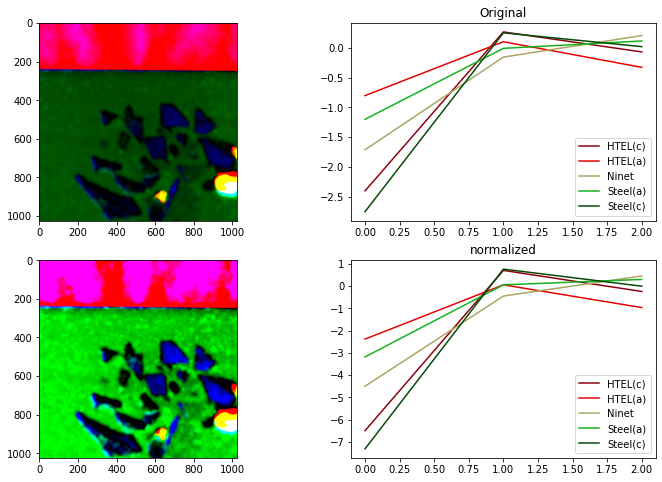

In [16]:
fig,(ax1,ax2) = plt.subplots(2,2,figsize=(12,8))
ax1[0].imshow(hs_pc)
ax1[1].plot(hs_pc[hcy,hcx,:],color='#8C000F',label="HTEL(c)")
# HTEL(b)
ax1[1].plot(hs_pc[hay,hax,:],color='#E50000',label="HTEL(a)")

# Ninet
ax1[1].plot(hs_pc[niy,nix,:],color='#AAA662',label="Ninet")

# Steel(b)
ax1[1].plot(hs_pc[say,sax,:],color='#15B01A',label="Steel(a)")

# Steel(b)
ax1[1].plot(hs_pc[scy,scx,:],color='#054907',label="Steel(c)")
ax1[1].legend()
ax1[1].title.set_text("Original")

ax2[0].imshow(hsn_pc)
ax2[1].plot(hsn_pc[hcy,hcx,:],color='#8C000F',label="HTEL(c)")
# HTEL(b)
ax2[1].plot(hsn_pc[hay,hax,:],color='#E50000',label="HTEL(a)")

# Ninet
ax2[1].plot(hsn_pc[niy,nix,:],color='#AAA662',label="Ninet")

# Steel(b)
ax2[1].plot(hsn_pc[say,sax,:],color='#15B01A',label="Steel(a)")

# Steel(b)
ax2[1].plot(hsn_pc[scy,scx,:],color='#054907',label="Steel(c)")
ax2[1].legend()
ax2[1].title.set_text("normalized")

In [ ]:
# Plot
plt.figure(figsize=(6,4))
xi = np.arange(1, 11, step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
# plt.xticks(np.arange(1, 1+im.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [1]:
from models.BranchedERFNet import BranchedMultiModalNet
import torch
rgb = torch.randn(2,3,416,416)
hs = torch.randn(2,154,416,416)

model = BranchedMultiModalNet(154,[4,5])


Creating branched hypernet with [4, 5] classes


In [4]:
# print(model.modules)
output,F = model(hs,rgb)
print(output.shape)
print(F[2].shape)

torch.Size([2, 9, 416, 416])
torch.Size([2, 64, 104, 104])
